# MACHINE LEARNING-2
## UNSUPERVISED ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Reading


In [3]:
df = pd.read_csv("E:/IMARTICUS LEARNING/Test Imarticus/4.Machine Learning/ML 2/credit_card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

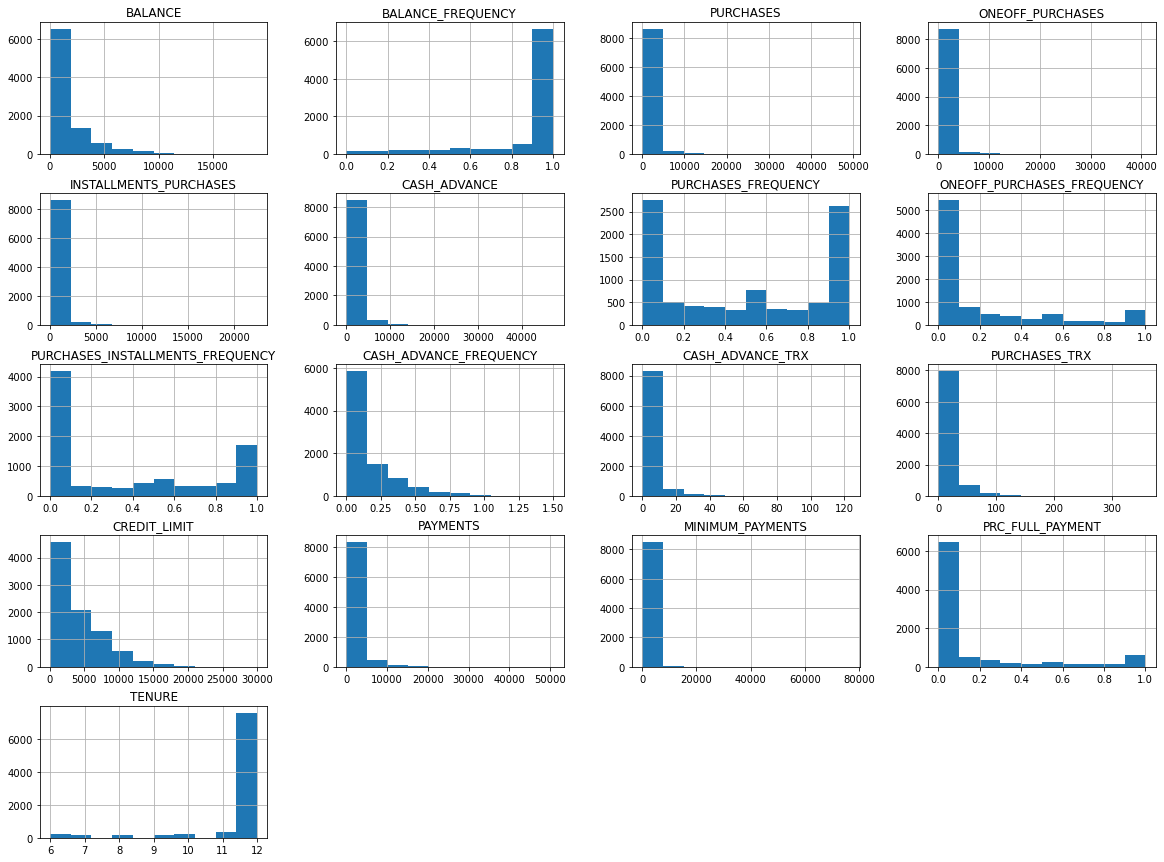

In [6]:
## histogram 

df.hist(figsize= [20,15])
plt.show()

In [7]:
## Dropping the Customer ID column

df= df.drop(['CUST_ID'], axis=1)

In [8]:
df.shape

(8950, 17)

In [9]:
df['TENURE'].mean()

11.51731843575419

## QUESTION 1

**1. This is a clustering problem i.e unsupervised learning as there is no target column mentioned in the problem statement.**

**2. There might be missing values in credit limit and minimum payments column as the value is less than 8950.**

**3. We can remove cust_id column as it doesn't have any impact on models.**

**4. Tenure of credit card usage by customers is between 6 to 12, but average being 11.5 years, hence there may be outliers present in this column. The other columns might have similar impact.**

## Question 2

### a) Missing value treatment

In [10]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### We can see that credit card dataset has 2 missing values column and there are 1 and 313 missing values in credit limit and  minimum payment column respectively. So let's fill these missing values with the mean of their respective column 

In [11]:
## describing the dataset column 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [12]:
mean_val= df['CREDIT_LIMIT'].mean()
mean_val

4494.449450364621

In [13]:
df['CREDIT_LIMIT'].fillna(value=mean_val, inplace=True)

In [14]:
mean_value = df['MINIMUM_PAYMENTS'].mean()
mean_value

864.2065423050816

In [15]:
#df['MINIMUM_PAYMENTS'].fillna(value=mean_value, inplace=True)

In [16]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
df.shape

(8950, 17)

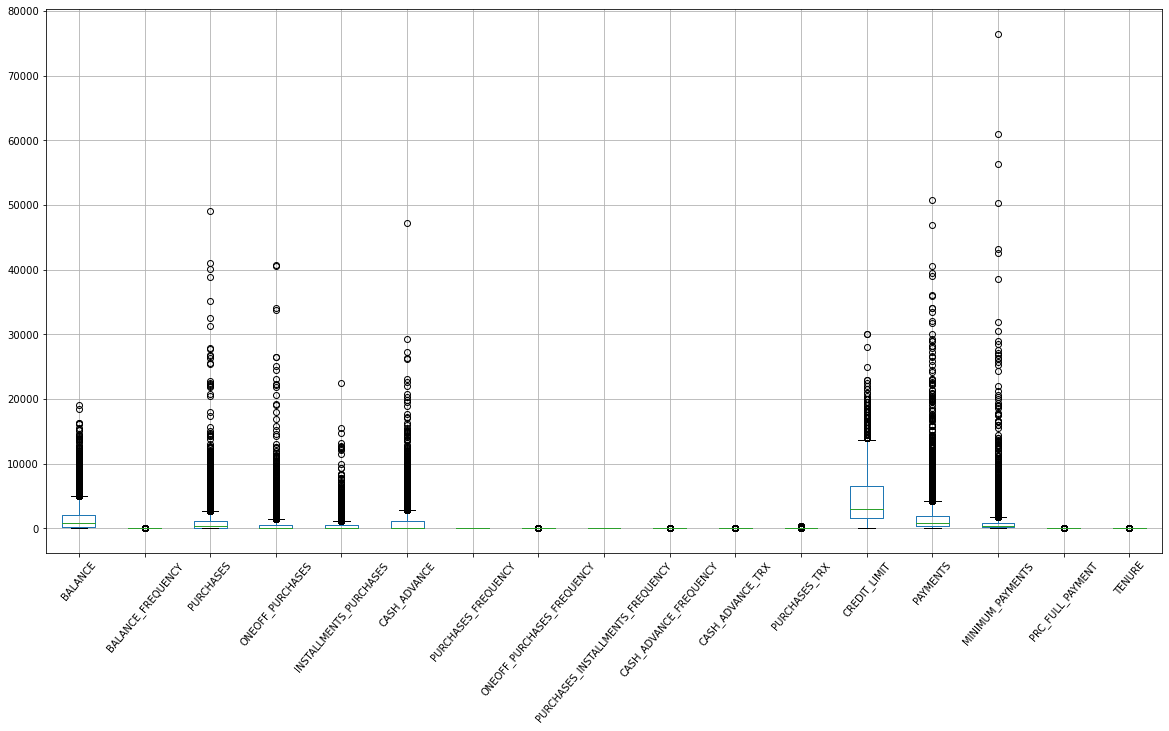

In [18]:
df.boxplot(figsize= [20,10])
plt.xticks(rotation = 50)
plt.show()

#### The outliers of multiple columns can't be interpretted properly so creating seperate boxplot for such columns 

In [19]:
#df.drop(['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [20,10])
#plt.xticks(rotation = 90)
#plt.show()

In [20]:
df['MINIMUM_PAYMENTS'].fillna(312.343947, inplace = True)

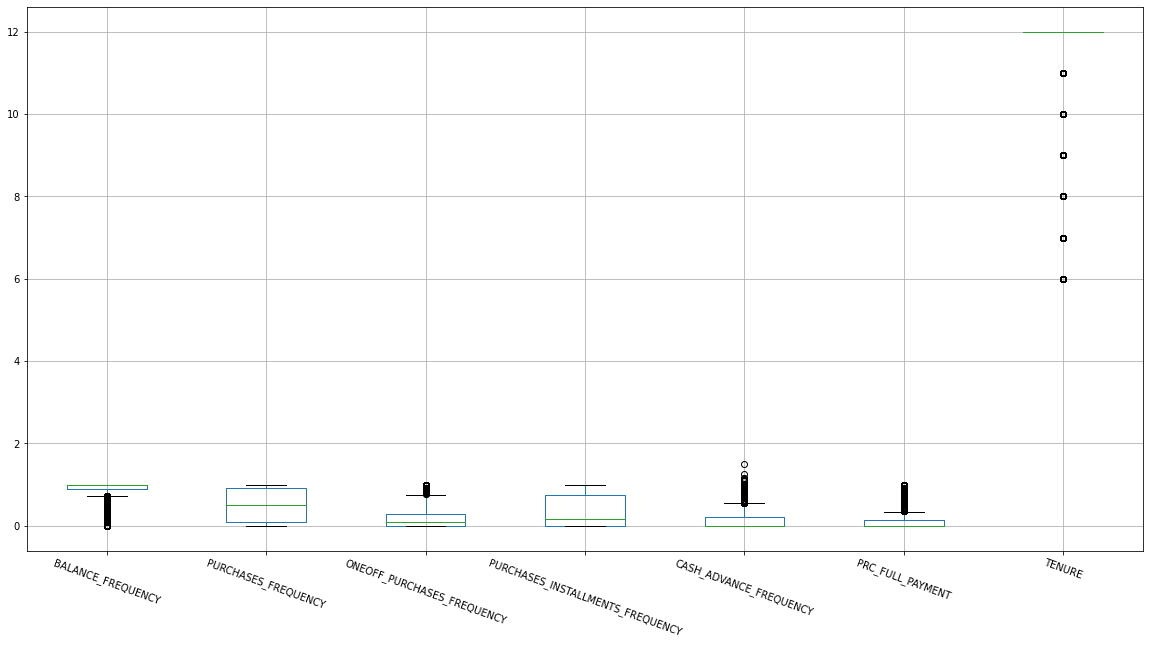

In [21]:
df.drop(['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [20,10])
plt.xticks(rotation = 340)
plt.show()

In [22]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### b) Treating Outliers Using Z-score Method

In [23]:
from scipy.stats import zscore 
df['zscore1'] = ( df.CASH_ADVANCE - df.CASH_ADVANCE.mean() ) / df.CASH_ADVANCE.std()
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759


In [24]:
df[df['zscore1']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3.335717
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11,3.764372
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,3.600948
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,12.549146
128,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12,3.520604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12,4.520442
8422,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,5.232320
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12,4.665270
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,6.650849


In [25]:
df1 = df[(df.zscore1>-3) & (df.zscore1<3)]

In [26]:
from scipy.stats import zscore 
df1['zscore2'] = (df1.PURCHASES - df1.PURCHASES.mean() ) / df1.PURCHASES.std()
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


In [27]:
df1[df1['zscore2']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,-0.466759,5.380597
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,-0.466759,9.863385
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,0.698836,4.126864
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12,0.306039,4.328347
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12,-0.466759,4.622810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12,-0.049251,4.964860
7378,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,-0.230001,5.160985
7553,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12,-0.466759,5.174911
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,-0.466759,3.383858


In [28]:
df1[df1['zscore2']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2


In [29]:
df1 = df1[(df1.zscore2>-3) & (df1.zscore2<3)]

In [30]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


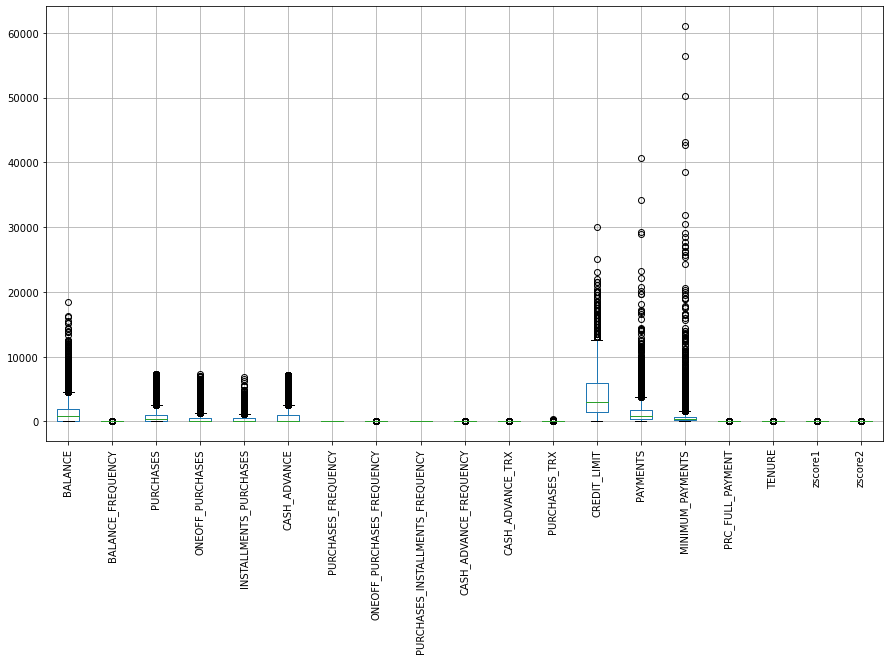

In [31]:
df1.boxplot(figsize= [15,8])
plt.xticks(rotation = 90)
plt.show()

### c) Correlated variables 

In [32]:
dcorr = df.drop('zscore1', axis =1).corr()

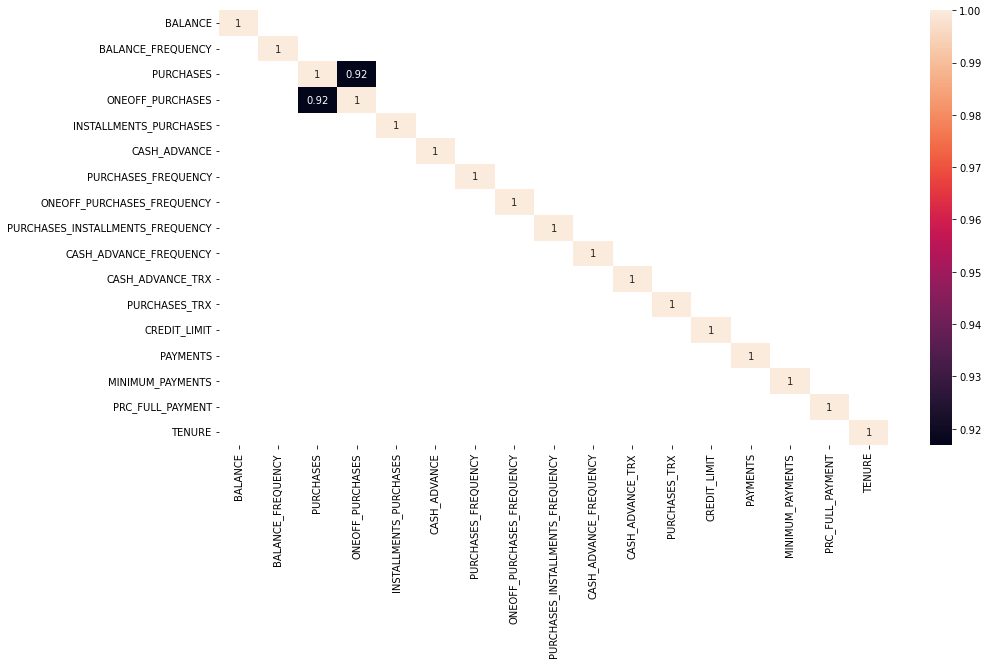

In [33]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(dcorr[(dcorr>0.90) | (dcorr<-0.90)],annot = True)
plt.show()

**We can observe that with 90% threshold purchase and one off purchase columns are correlated**

## Question 3

In [34]:
df_num_features = df1.select_dtypes(include=[np.number])
df_num = df_num_features.drop('TENURE',axis=1)
df_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,-0.466759,-0.463328


In [35]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df_num)
print(df_scaled)

[[-0.73266711 -0.23380085 -0.60997863 ... -0.52219597 -0.56877272
  -0.60997863]
 [ 0.92083437  0.1454145  -0.69052051 ...  0.24091211  4.1599222
  -0.69052051]
 [ 0.5509063   0.52462985 -0.03776823 ... -0.52219597 -0.56877272
  -0.03776823]
 ...
 [-0.7418207  -0.17060038 -0.56861016 ...  0.33630148 -0.56877272
  -0.56861016]
 [-0.74701991 -0.17060038 -0.69052051 ...  0.33630148 -0.541941
  -0.69052051]
 [-0.55913165 -0.86582644  0.23246077 ... -0.52219597 -0.47553377
   0.23246077]]


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 11, random_state = 24)

In [37]:
df_pca = pca.fit_transform(df_num)

In [38]:
df_pca[:2]

array([[-3.97236506e+03, -2.15789070e+02, -3.81691759e+02,
         5.63483271e+01,  1.44167983e+02,  2.09959494e+02,
        -6.03427653e+01, -2.36144995e+00, -1.50555760e-01,
        -1.00870237e+00,  3.28233473e-01],
       [ 4.29986894e+03,  1.20920514e+03,  1.50899159e+03,
        -4.25710155e+03,  2.17680132e+03, -2.39858759e+03,
         1.33981611e+02,  5.31938576e-01,  3.33212700e-02,
        -1.40682902e+01,  4.21561483e-02]])

In [39]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.50375648 0.68740812 0.80801986 0.90325858 0.95799633 0.98643238
 0.99999179 0.99999817 0.99999933 0.99999999 0.99999999]


In [40]:
df_pca_cc = pd.DataFrame(df_pca[:,:5])
df_pca_cc.head()

,0,1,2,3,4
0,-3972.365055,-215.789070,-381.691759,56.348327,144.167983
1,4299.868940,1209.205140,1508.991587,-4257.101548,2176.801315
2,2848.282145,-828.862196,-1771.881847,441.198721,-512.259764
3,2550.545790,-1495.435775,-1826.139071,1036.183946,-895.796982
4,-3418.165809,134.581603,-127.481839,-329.077277,-57.034413


**Thus acheiving variance of 95.79% by reducing features 5 by PCA using sklearn**

## Question 4

In [41]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df1.T) #.T to transpose as numpy considers a row as the variable/feature

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 3.65633352e+06  1.51388189e+02  2.56056713e+05  1.91706338e+05
   6.41399490e+04  1.31981310e+06 -7.02314026e+01  3.23036068e+01
  -5.93007784e+01  1.58509660e+02  4.11215371e+03  4.08421840e+03
   3.18163681e+06  9.20376311e+05  1.53636442e+06 -1.85973937e+02
   2.12970259e+02  6.29332364e+02  1.20225236e+02]
 [ 1.51388189e+02  5.74767538e-02  5.08881686e+01  2.88086370e+01
   2.20690764e+01  3.54068018e+01  2.19976794e-02  1.38539055e-02
   1.65865513e-02  8.69021660e-03  1.99712126e-01  9.83798593e-01
   6.67528640e+01  2.32410294e+01  6.92700638e+01 -7.01802594e-03
   3.80412113e-02  1.68831832e-02  2.38933087e-02]
 [ 2.56056713e+05  5.08881686e+01  1.40314800e+06  9.04589379e+05
   4.98794504e+05 -2.10506495e+05  2.59295817e+02  2.13867123e+02
   2.00485782e+02 -3.87109789e+01 -7.79733690e+02  1.75756194e+04
   1.28611729e+06  9.33407650e+05  1.02032127e+05  6.69269615e+01
   1.73579721e+02 -1.00376750e+02  6.58814204e+02]
 [ 1.91706338e+05  2.88086370e+01  9.04589379e+05  7.83

In [42]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 1.41316807e+07  5.15190668e+06  3.38347329e+06  2.67169379e+06
  1.53553637e+06  7.97705318e+05  3.80376702e+05  1.79075259e+02
  3.26849236e+01  1.83504362e+01  1.67784804e+00  1.50244820e-01
  6.36780604e-02  5.24223288e-02  3.92223803e-02  9.12699705e-03
  6.05567132e-03  1.55630164e-15 -1.68357088e-16] 

Eigenvectors: 
 
 [[ 3.29825893e-01  3.90571868e-01  7.62044093e-02 -5.03735366e-01
  -5.85959972e-01  3.68459684e-01  1.62719081e-04 -5.40216917e-04
   1.89206713e-05  3.28731024e-04 -5.97202048e-05 -2.99764981e-05
   6.83063301e-05  2.84496224e-05  3.72130957e-05 -8.56823325e-06
  -2.06354082e-06  1.45699400e-16  1.26760291e-16]
 [ 9.74309592e-06  1.92891789e-05 -3.65388036e-06 -1.16239348e-05
  -5.76216408e-05  2.08652117e-06  2.52262352e-05  1.40849743e-03
  -2.92058317e-04 -3.85514864e-03  1.72089096e-02 -1.56260410e-01
  -1.10613492e-01 -6.37067810e-01 -7.41194525e-01 -8.50302768e-02
  -2.40705732e-02 -3.19645872e-12 -2.77114909e-12]
 [ 1.19892718e-01 -7.03

In [43]:
# create a list of eigenvalues
eig_val = list(eig_val) #Optional

In [44]:
# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True) #Descending order
print(eig_val)

[14131680.696923621, 5151906.684012523, 3383473.2870707256, 2671693.792923472, 1535536.3695076397, 797705.3176611153, 380376.70213282236, 179.07525944884452, 32.68492360432011, 18.350436151712668, 1.6778480354743814, 0.15024481984445578, 0.06367806042822424, 0.05242232877607398, 0.03922238027165145, 0.00912699704672546, 0.006055671322843736, 1.5563016375049248e-15, -1.6835708786110095e-16]


Text(0, 0.5, 'Percentage of explained variance')

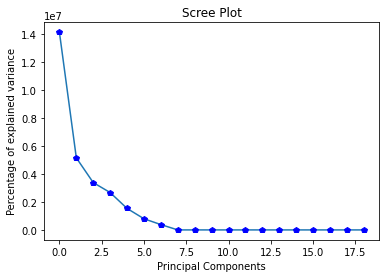

In [45]:
# plot a line plot
plt.plot(eig_val) 
plt.plot(eig_val,'bp')
plt.title('Scree Plot')
plt.xlabel('Principal Components')    
plt.ylabel('Percentage of explained variance') 

### Elbow point is 2 from the above graph

## Question 5

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### USING PCA columns

In [47]:
n_clusters = range(2,21)

for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 20)
    predict = cluster.fit_predict(df_pca_cc)
    
    score = silhouette_score(df_pca_cc, predict, random_state= 20)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.4755252211444271)
For n_clusters = 3, silhouette score is 0.3922055648317852)
For n_clusters = 4, silhouette score is 0.399116300077165)
For n_clusters = 5, silhouette score is 0.41127845360933846)
For n_clusters = 6, silhouette score is 0.41408132585216134)
For n_clusters = 7, silhouette score is 0.38789122452988967)
For n_clusters = 8, silhouette score is 0.39220782291616996)
For n_clusters = 9, silhouette score is 0.39854421037844384)
For n_clusters = 10, silhouette score is 0.3363851826578123)
For n_clusters = 11, silhouette score is 0.31837175590457634)
For n_clusters = 12, silhouette score is 0.3175825625388172)
For n_clusters = 13, silhouette score is 0.29717734627283654)
For n_clusters = 14, silhouette score is 0.2983505700557854)
For n_clusters = 15, silhouette score is 0.28364380288141305)
For n_clusters = 16, silhouette score is 0.2884988065247632)
For n_clusters = 17, silhouette score is 0.2828283561918977)
For n_clusters = 18, silh

**Silhoutte score is highest for n_clusters= 2**

build a K-means clustering model

In [48]:
model = KMeans(n_clusters= 2, random_state= 10)
model.fit(df_pca_cc)

KMeans(n_clusters=2, random_state=10)

In [49]:
df_output = df1.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
df_output['Cluster'] = model.labels_
df_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328,0


In [50]:
np.unique(model.labels_, return_counts=True)

(array([0, 1]), array([6292, 2344], dtype=int64))

<AxesSubplot:xlabel='Cluster', ylabel='count'>

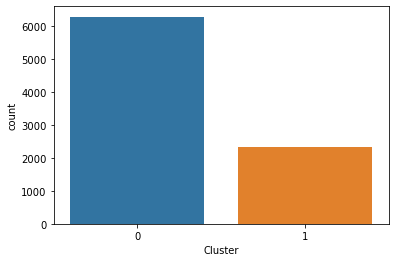

In [51]:
sns.countplot(data= df_output, x = 'Cluster')

## USING scaled data

In [52]:
n_clusters = range(2,21)

for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_scaled)
    
    score = silhouette_score(df_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.3169627977920364)
For n_clusters = 3, silhouette score is 0.2852083318038705)
For n_clusters = 4, silhouette score is 0.20597916677510947)
For n_clusters = 5, silhouette score is 0.2024981202871008)
For n_clusters = 6, silhouette score is 0.21403022217595677)
For n_clusters = 7, silhouette score is 0.21947660183985654)
For n_clusters = 8, silhouette score is 0.1932883864400605)
For n_clusters = 9, silhouette score is 0.19844729772689487)
For n_clusters = 10, silhouette score is 0.1945853802824841)
For n_clusters = 11, silhouette score is 0.19001772726377694)
For n_clusters = 12, silhouette score is 0.1935311059467978)
For n_clusters = 13, silhouette score is 0.19797040397930715)
For n_clusters = 14, silhouette score is 0.19619598436061852)
For n_clusters = 15, silhouette score is 0.19720446905710606)
For n_clusters = 16, silhouette score is 0.19658828284689323)
For n_clusters = 17, silhouette score is 0.19959010132198582)
For n_clusters = 18, s

In [53]:
model = KMeans(n_clusters= 2, random_state= 10)
model.fit(df_scaled)

KMeans(n_clusters=2, random_state=10)

In [54]:
df_output = df1.copy(deep = True)
df_output['Cluster'] = model.labels_
df_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.368633,0.232979,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328,0


In [55]:
np.unique(model.labels_, return_counts=True)

(array([0, 1]), array([6927, 1709], dtype=int64))

<AxesSubplot:xlabel='Cluster', ylabel='count'>

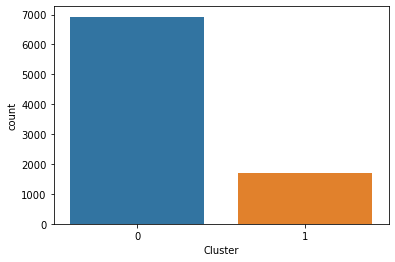

In [56]:
sns.countplot(data= df_output, x = 'Cluster')